# Lending Club Case Study - Exploratory Data Analysis

### Group Members 
 - Ruchir Mayank
 - Srivishnu Ayyagari



### Business Understanding:
- Lending Club(LC) is a platform where borrower's can borrow money at lower interest rate.On the other hand LC allows investor to get better return based on the interest they choose to lend to the borrowers.
- LC will make a loss when one or more borrowers start defaulting on the money to be repaid
- In some cases LC is able to recover some amount via settlement but the amount that is not recovered will be loss to the company

### Business Objectives
- LC wants to analyse the factors that can help them decide if the borrowers are likely to default and hence take the decision based on such data.


### Exploratory Data Analysis

#### Data Sourcing and cleaning

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')
import re

**Reading the loan data**

In [2]:
loan=pd.read_csv('loan.csv',encoding='ISO-8859-1',low_memory=False)
#have to set low-memory as false as the col 47 have mixed data type and read_csv is not able to process it without this option
loan.shape
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

**Data Cleaning**

We will first try to find out how many columns have missing or null values and what percentage of the values are missing in respective columns. Depending on the outcome we will decide if we want to fill the missing values or we want to remove them from our analysis.

In [3]:
nullValuePercentagePerColumn=round(loan.isnull().sum()/len(loan.id),4)*100
#nullValuePercentagePerColumn.loc[nullValuePercentagePerColumn>0]
nullValuePercentagePerColumn.loc[nullValuePercentagePerColumn>10]

desc                               32.58
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m    

We can see from above output that there are 54 column where 100% of the data is missing and there are additional 4 columns where more than 30% of the data is missing. We will drop these columns from our analysis

In [4]:
columnWithNullvalue=list(nullValuePercentagePerColumn[nullValuePercentagePerColumn>=30].index)
#len(columnWithNullvalue)
loan.drop(columnWithNullvalue,axis=1,inplace=True)
loan.shape

(39717, 53)

We will also look into the column where the unique value is same, in that case that copluimn does not adds any value to the analysis

In [5]:
uniqueValuePerColumn=loan.nunique()
uniqueValuePerColumn=uniqueValuePerColumn[uniqueValuePerColumn.values == 1]
uniqueValuePerColumn

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

Let's drop the above columns

In [6]:
loan.drop(labels = list(uniqueValuePerColumn.index),axis=1,inplace=True)
loan.shape

(39717, 44)

44 columns are remianing, we will examine remaining column for null values

In [7]:
nullValuePercentagePerColumn=round(loan.isnull().sum()/len(loan.id),4)*100
nullValuePercentagePerColumn[nullValuePercentagePerColumn>0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

- We will analyse the unique value for each of the aformentioned columns with missing or null values
- From the data dictionary file we understand that the **emp_title** and **title** are free string that teh borrower provide. We will make an assumption that it will be hard to make a categorical decision based on these and hence we will drop the rows with null/missing values for these columns.
- Since the percentage of null/missing valuses for these coulmns are very less , I will still like to keep the column for future refrence
- **emp_length** column provides information about how long the borrower has beenn employeed. This information may be usefull but there is no additional information provided based on which we can fill teh missing value. So we will drop the rows with missing value for this also

In [8]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan.shape

(37193, 44)

Let's look into the unique values for columns which are not free strings

In [9]:
loan.emp_length.unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [10]:
loan.revol_util.unique()

array(['9.40%', '21%', '53.90%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [11]:
loan.last_pymnt_d.unique()

array(['Apr-13', 'Jan-15', 'May-16', 'Nov-12', 'Jun-13', 'Sep-13',
       'Jul-12', 'Oct-13', 'May-13', 'Feb-15', 'Aug-15', 'Oct-12',
       'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13', 'Nov-13', 'Jan-14',
       'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12', 'Jul-14', 'Jul-13',
       'Jan-16', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12', 'Feb-13',
       'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13', 'Jun-14',
       'Feb-12', 'Mar-14', 'Apr-12', 'Sep-15', 'Nov-15', 'Mar-16',
       'Feb-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [12]:
loan.last_credit_pull_d.unique()

array(['Sep-13', 'Apr-16', 'May-16', 'Jan-16', 'Dec-14', 'Mar-13',
       'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15', 'May-14',
       'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13', 'Jan-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14', 'Jun-15',
       'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15', 'Jul-14',
       'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Oct-15',
       'Apr-12', 'Aug-15', 'Jun-14', 'Aug-12', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Oct-11', 'Sep-11', 'Jan-13', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09', 'May-09',
       'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 'Dec-

In [13]:
loan.pub_rec_bankruptcies.unique()   

array([ 0.,  1.,  2., nan])

Let's remove  the rows with null values in the above columns


In [14]:
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan=loan[~loan.last_credit_pull_d.isnull()]
loan=loan[~loan.pub_rec_bankruptcies.isnull()]
loan.shape

(36433, 44)

At this point I will fall back to some manual interpetation by looking into the data dictonary file and checking if any of  the remaining columns are required.

In [15]:
loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

**id**:A unique LC assigned ID for the loan listing.<br>
**member_id**: A unique LC assigned Id for the borrower member.<br>
**url**:A unique LC assigned Id for the borrower member.<br>
    
The above values are just additional attribute which does not have any corelation with the borrower or lender patterns. So these should be safe to remove.

<br>**funded_amnt**: The value is almost same as the loan amount
<br>**funded_amt_inv**: The value is almost same as the loan amount

These values  may cause a small varitaionin anakysis but since for majority of the data value remains the same these will have negligible impact and hence safe to drop.
     
   

In [16]:
dropColumns=['id','member_id','url','funded_amnt','funded_amnt_inv']
loan.drop(dropColumns,axis=1,inplace=True)
loan.shape

(36433, 39)

From the data dict file we saw that emp length can take values from 0 to 10 but from previous analysis we see that thecolumn has mix representation in values. So we will stndarise teh values from 0 to 10

In [17]:
empLengthDef = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan.replace({'emp_length':empLengthDef},inplace=True)

Till now we have reduced the dataset to 399 columns. But the data in each of the columns are not in a standard format.
Similar to what we have doen for emp_length we will have to analyse the columns and stadarise the values

In [18]:
loan.total_pymnt.value_counts().head()

11196.569430    26
11784.232230    16
13148.137860    15
10956.775960    13
5478.387981     13
Name: total_pymnt, dtype: int64

In [19]:
loan.total_rec_late_fee.value_counts().head()

0.0     34618
15.0      224
30.0       51
15.0       49
15.0       42
Name: total_rec_late_fee, dtype: int64

In [20]:
loan.collection_recovery_fee.value_counts().head()

0.00    33100
1.20       10
2.00        9
2.02        8
1.69        8
Name: collection_recovery_fee, dtype: int64

We will keep the precsion to 2 decimial poinyts for above columns

In [21]:
loan.total_pymnt=round(loan.total_pymnt,2)
loan.total_rec_late_fee= round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee= round(loan.collection_recovery_fee,2)
#loan.collection_recovery_fee.value_counts().head()

Similarly we will standarise any date time column to standard dattime format of **mon-year**<br>
Refernce to do this : https://stackabuse.com/how-to-format-dates-in-python/

In [22]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

Looking into the loan.csv file and checking teh columns we see few more anamolies in data that needs to be fixed.
Doing  those belows along with inline comments for easier reference

In [23]:
loan.term.value_counts()#removingthe "month" string from column
#loan['term']=loan['term'].replace("month",'',regex=True)
# The replace function is somehow adding s at the end. Hence I am using brute force to split based on the pattern
loan['term'] = loan.term.apply(lambda x: x.split()[0])
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

This seems to be the last of cleaning effort. Removing % from rate columns. If anyting is left we will update when we encounter the occurrence

In [24]:
loan.int_rate.head()

1    15.27%
3    13.49%
4    12.69%
5     7.90%
6    15.96%
Name: int_rate, dtype: object

In [25]:
loan.revol_util.head()

1     9.40%
3       21%
4    53.90%
5    28.30%
6    85.60%
Name: revol_util, dtype: object

In [26]:
loan['int_rate'] = loan.int_rate.apply(lambda x: x.split('%')[0]).astype('float')
loan['revol_util']=loan.revol_util.apply(lambda x: x.split('%')[0]).astype('float')
#loan.revol_util.head()

### Derived Variables
We have cleaned up the data now we should derive certain columns that will help us in doing the analysis

1. Lets try to get the loan repayment capacity for each borrower. loan amount to income should give a good inight into this

In [27]:
loan['loan_income_ratio']=loan['loan_amnt']/loan['annual_inc']

 2. Extracting year and date from loan issue date and from early_cr_Date

In [28]:
loan['issue_month'] = loan['issue_d'].dt.month
loan['issue_year']=loan['issue_d'].dt.year
#loan.issue_year.head()
loan['early_cr_month']=loan['earliest_cr_line'].dt.month
loan['early_cr_year']=loan['earliest_cr_line'].dt.year

Based on data validation we see that the early_cr_year is yeileding date in future. This is because the older years are being interperated as in 2000's. We will have to fix this to reflet the correct years.

In [29]:
loan.early_cr_year.unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1987, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2068, 1974, 2067, 2065, 2063,
       2066, 2062, 2056, 2046, 2050, 2064, 2054])

In [30]:
loan.loc[loan['early_cr_year']>2011,'early_cr_year'] = loan['early_cr_year'] -100
loan.early_cr_year.unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1987, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 1968, 1974, 1967, 1965, 1963,
       1966, 1962, 1956, 1946, 1950, 1964, 1954])

3. Create bucket for int_rates

In [31]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

4. Create bucket for Annual income

In [32]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

5. Create bucket for loan amount

In [33]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

## Analysis

### Univariate Analysis

The type of variables used for analysis can be divided in two types

    1.Continuous variable: We will use boxplot, histogram to analyse the data
    2. Categorical variable: We will use counplot or bar chart to analyse the data

We will define generic functions to plot the graph and then call the functions in required places

In [34]:
def continuous_var_plot(df,col,hue=None):
 fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
 ax[0].set_title("Distribution Plot")
 sns.distplot(df[col],ax=ax[0])
 ax[1].set_title("Box Plot")
 sns.boxplot(data =df, x=df[col],y=df['loan_status'])  
 plt.show()

In [35]:
def categorical_vr_plot(df,col,hue=None):
     temp = pd.Series(data = hue)
     fig, ax = plt.subplots()
     width = len(df[col].unique()) + 6 + 4*len(temp.unique())
     fig.set_size_inches(width , 7)
     ax = sns.countplot(data = df, x= df[col], order=df[col].value_counts().index,hue = hue) 
     if len(temp.unique()) > 0:
        for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
     else:
        for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
     del temp 
     plt.show()

Lets start analysis with continuous variables

## Continuous Variable

### 1. Loan Amount

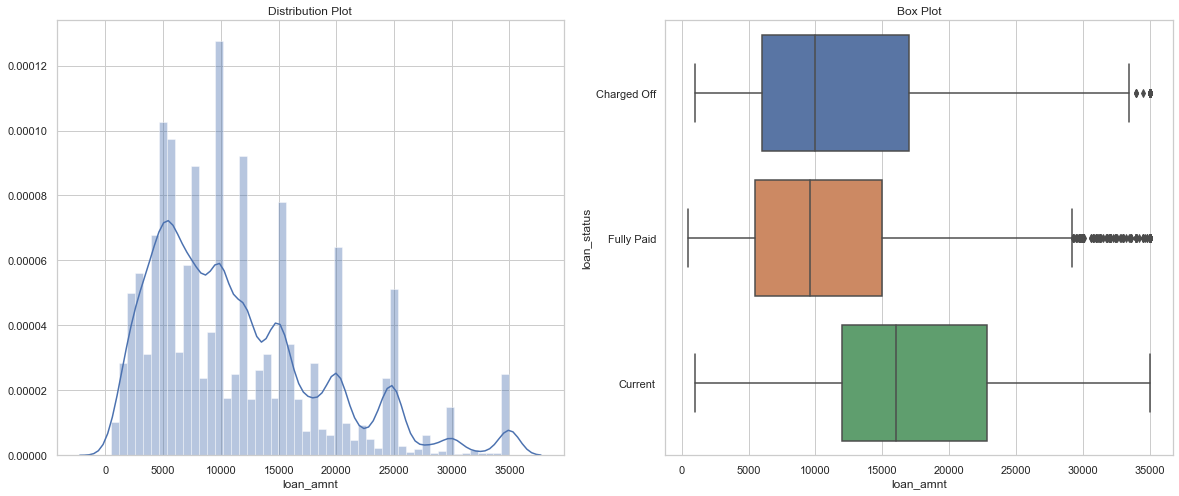

In [36]:
continuous_var_plot(df=loan,col='loan_amnt')

In [37]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Current,1066.0,17100.703565,8571.093163,1000.0,12000.0,16000.0,22800.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


**Observation**:
 - The fully paid loan could be discounted from analysis as this does not provide any insight
 - From the boxplot it can be infered that the charged off amoubt has wider range from 50th to 75th quatrtile i.e from 10k to 17 k.
 - Most of the loan amounts is around 5000 USD

### 2. Interest rate

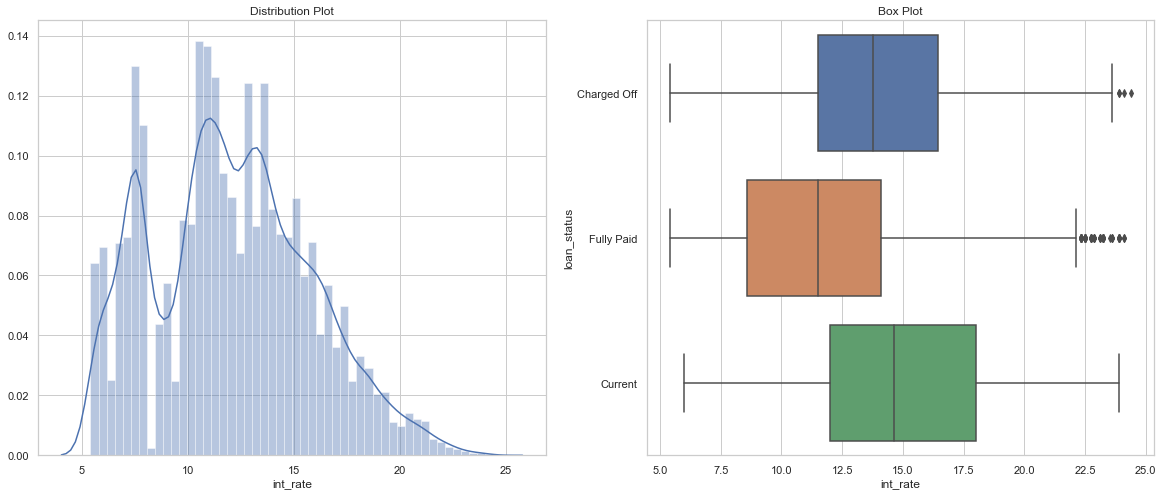

In [38]:
continuous_var_plot(df=loan,col='int_rate')

In [39]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Current,1066.0,15.072880,3.556882,6.00,11.99,14.65,17.99,23.91
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


**Observation**:
 - The interest rate range is from 5.42% to 24.4 %
 - The interest rate for chargedd off loans are generally higher than fully paid loans

### 3. Annual Income

In [40]:
loan['annual_inc'].describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

From above it can be see that there are outliers as max value is $6MM but the mean is ~70k and 75th percentile is also ~83k.<br>So let's remove the outlier before we analyse
<br>We will only keep data which is in 3 time rane if mean on either side

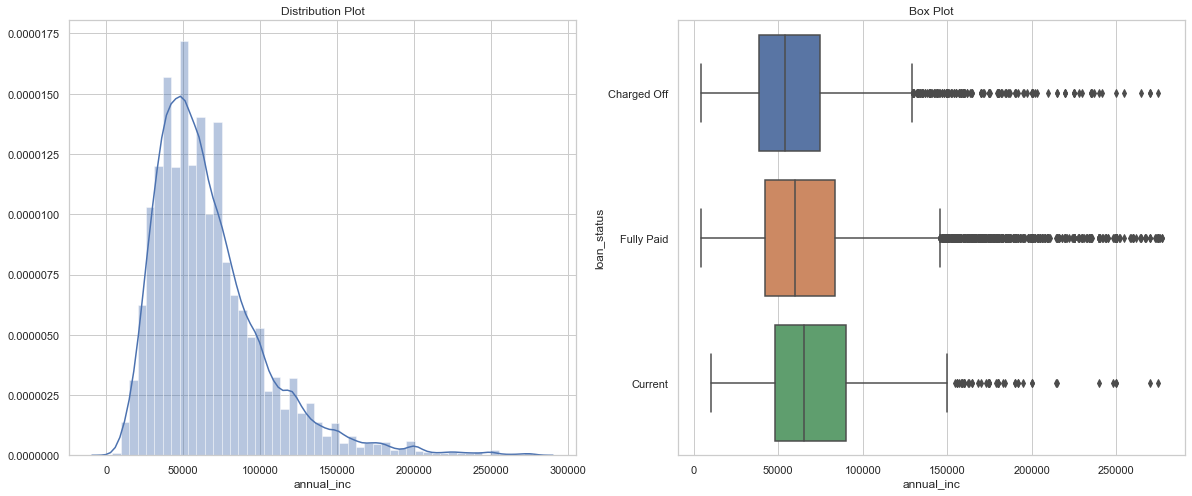

In [41]:
loan_subset=loan[np.abs(loan.annual_inc - loan.annual_inc.mean())<=(3*loan.annual_inc.mean())]
continuous_var_plot(df=loan_subset,col='annual_inc')


In [42]:
loan_subset.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4922.0,61098.291109,33893.123121,4080.0,38400.0,54000.0,75000.0,275000.0
Current,1059.0,74173.299207,38148.565213,10020.0,48000.0,65000.0,90000.0,275000.0
Fully Paid,30234.0,67326.525725,36604.311185,4000.0,42000.0,60000.0,83475.0,277104.0


**Observation**:
 - Most of the loan borrwed fall between the 4,000 usd to 90,000 USD
 - The average loan taken is about 66.680 USD
 - The charged off amont is slightly right skewed but there is not much difference between 25th-50th quartile and 50th-75th quartile

## Categorical Variable

### 4. Loan Status 

In [43]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

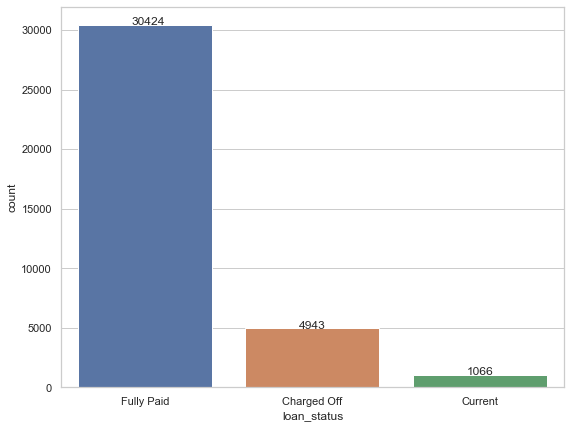

In [44]:
categorical_vr_plot(df=loan,col='loan_status')

In [45]:
print(loan.groupby('loan_status')['loan_status'].describe())
print("loan defaulted: " +str(round(loan.loc[loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan))))
print("loan recovered: " +str(round(loan.loc[loan['loan_status'] == 'Fully Paid'].loan_status.count() * 100/len(loan))))

             count unique          top   freq
loan_status                                  
Charged Off   4943      1  Charged Off   4943
Current       1066      1      Current   1066
Fully Paid   30424      1   Fully Paid  30424
loan defaulted: 14.0
loan recovered: 84.0


**Observation**:
 - Approximately 14% of the borrower defaults on the loan
 - Approximately 84% of the borrower settled the loan

### 5. Loan Recovered

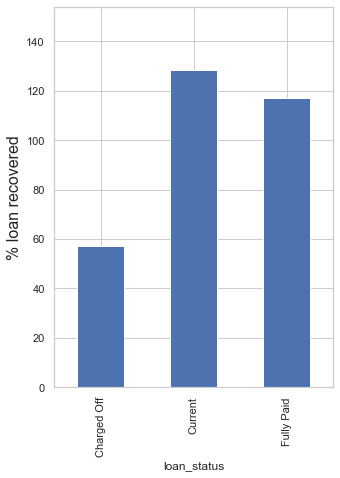

In [46]:
#Here we are using custom columns not part of df and hence not able to directly use the earleir defined functions. One way is to enahcne
#enhance the function but since it is one off case we are choosing to directly plot here
plt.figure(figsize=(5,7))
ax = (loan.groupby('loan_status').total_pymnt.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

In [47]:
print("loan amount recovered: " + str(loan.groupby('loan_status').total_pymnt.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()))

loan amount recovered: loan_status
Charged Off     57.127471
Current        128.363180
Fully Paid     117.242294
dtype: float64


**Observation**:
- For the defaulted loan only 57% of the amount are recovered.
- For the fully paid loan the club makes a revenue of ~17% of the amount

### 6. Purpose of Loan

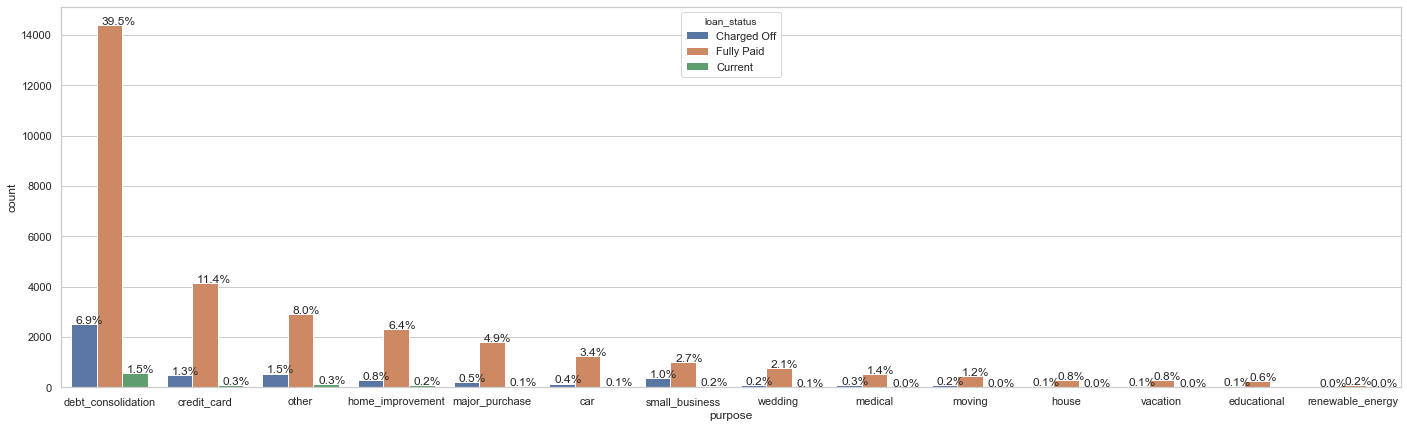

In [48]:
categorical_vr_plot(df=loan,col='purpose',hue='loan_status')

**Observation**:
 - ~46.5% of the applied loans where for clearing older debts
 - distant second was to repay credit card expense with approximated to 13%

### 7. Home Ownership wise loan

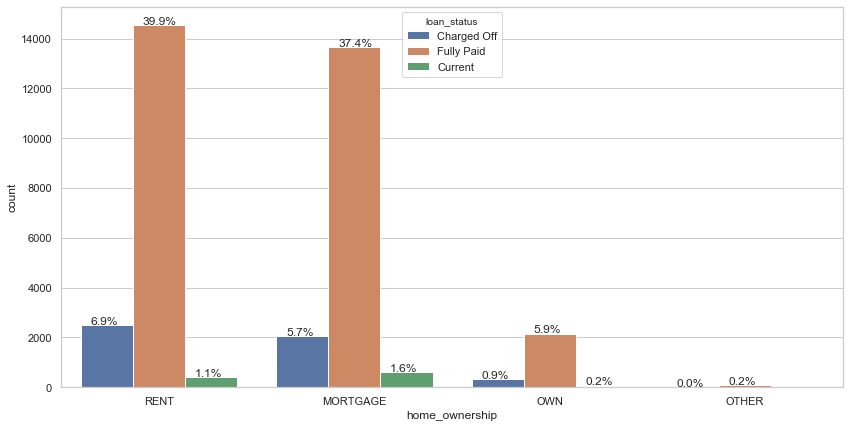

In [49]:
categorical_vr_plot(df=loan,col='home_ownership',hue='loan_status')

**Observation**:
 - ~48% of the borrower are living in rented homes
 - ~44% of the borrower have mortagaged their current home
 - The ratio of defaulter to fully paid is least in self-owned home borrowers

### 8. Loan Term

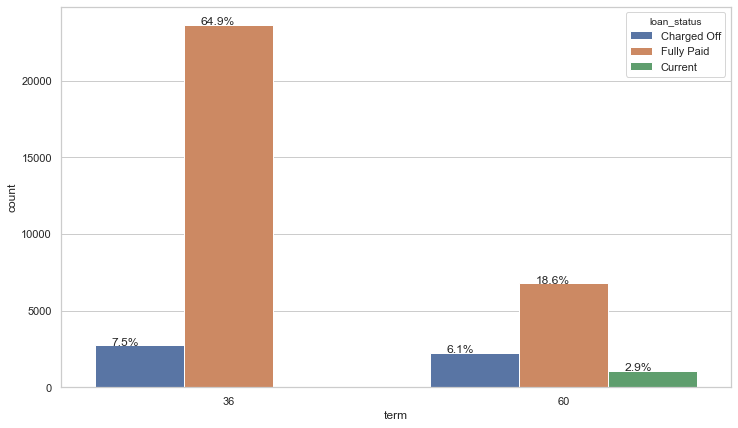

In [50]:
categorical_vr_plot(df=loan,col='term',hue='loan_status')

**Observation**:
 - ~72% of the total loan is given for duration of 3 years
 - ~28% of the toal loan is given for duration of 5 years

### 9. Year wise loan

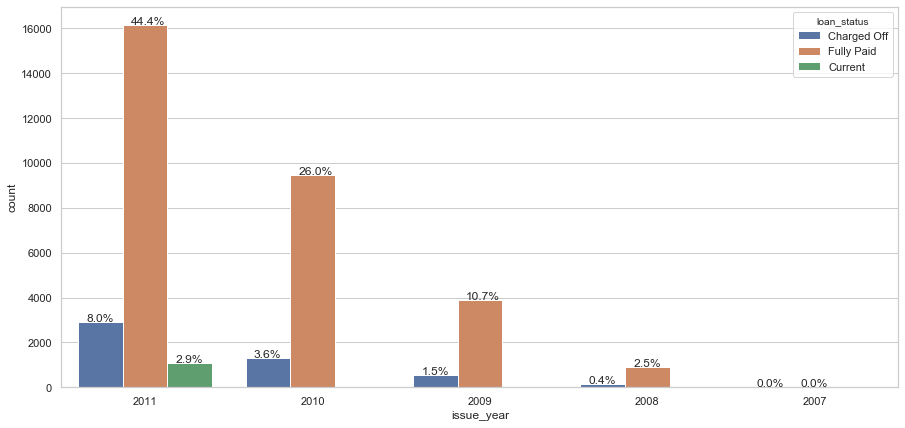

In [51]:
categorical_vr_plot(df=loan,col='issue_year',hue='loan_status')

**Observation**:
 - YoY increase in loan applciation for 2011 is ~83%

### 10. Verification_status

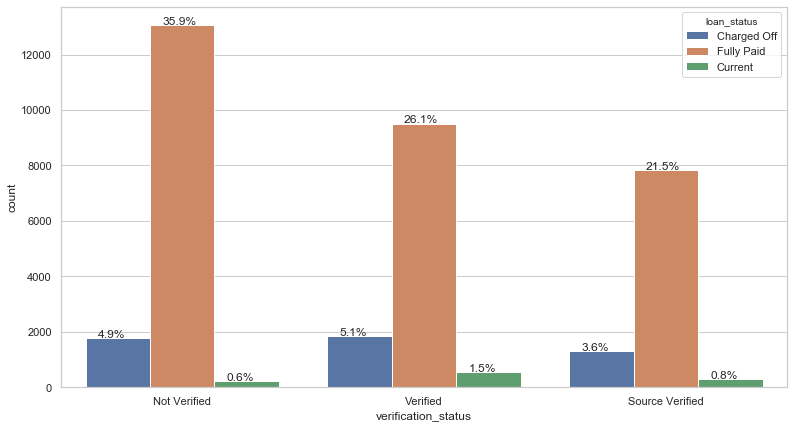

In [52]:
categorical_vr_plot(df=loan,col='verification_status',hue='loan_status')

**Observation**:
 - Non verified source are more than verified source and source verified source. 
 - Verified source shows more default( We have analysed in bivariate source)


## Bivariate Analysis

### 1. Avg loan amount over time

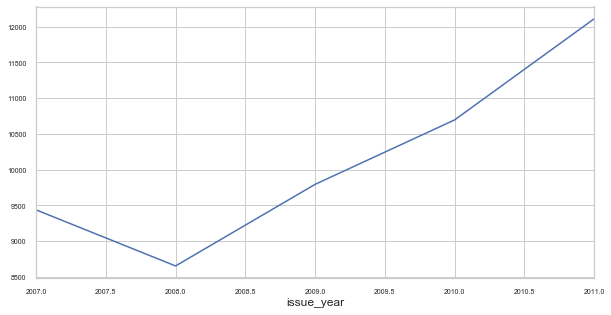

In [53]:
plt.figure(figsize=(10,5))
loan.groupby('issue_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Observation**:
 - We see a dip in loan borrowing in 2008. From there it's kind of linear increase till 2011

### 2.Purpose of Loan vs Loan Amount for each Loan Status

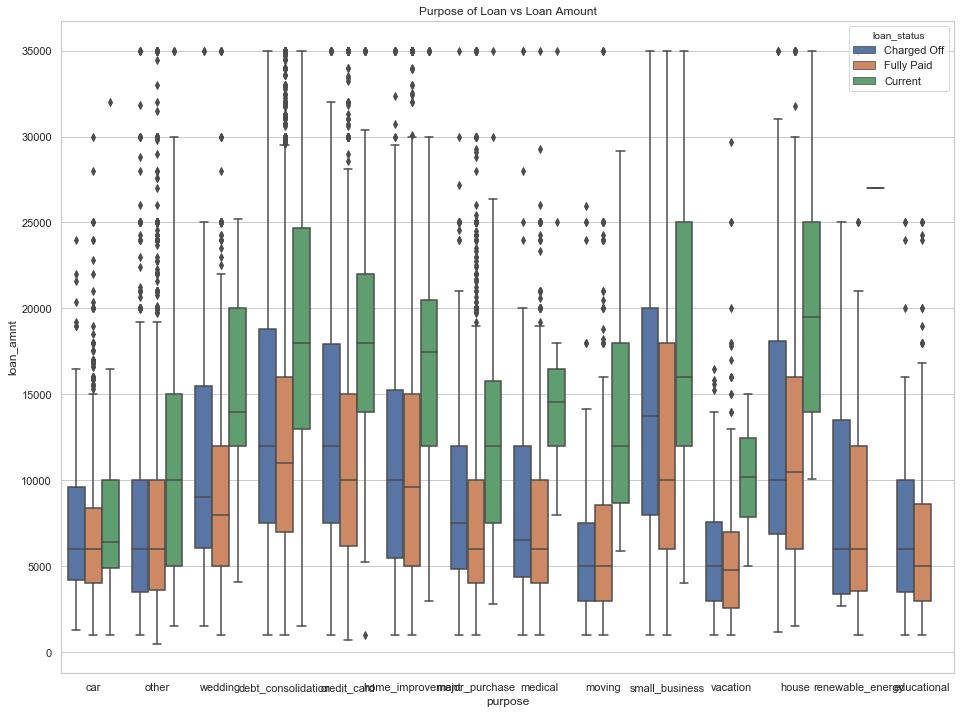

In [54]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

**Observation**
 - Max loan amount taken is for small businesses and the max default is also in the small business

### 3. loan_amnt and annual_inc

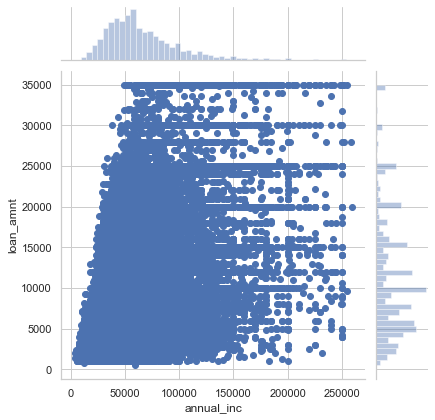

In [55]:
sns.jointplot('annual_inc', 'loan_amnt', loan.loc[loan['annual_inc']<260000])
plt.show()

**Observation**:
-  There are people with average income lower than 50000 taking loans of 250000 or higher. These would be risky loans. 

### 4.Interest Rate and Term

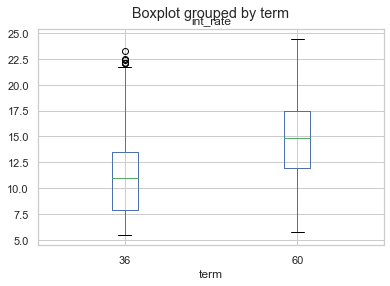

In [56]:
loan.boxplot(column='int_rate', by='term')
plt.show()

**Observation**:
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

### 5. loan_amnt vs verification_status vs loan status

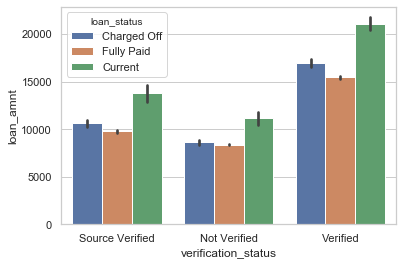

In [57]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)

**Observation**:
 - Loan with higher amount are verified more often

### 6. loan_income_ratio vs verification_status vs loan_status

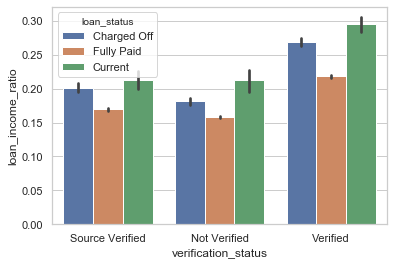

In [58]:
sns.barplot(x='verification_status', y='loan_income_ratio', hue="loan_status", data=loan, estimator=np.mean)

**Observation**:
 - Verified source have higher loan to income ratio i.e. the loan borrowed is larger than the earning capacity
 - Default is higher for verified source. The same could be inferred from #5(previous graph)
 - basd on the #5 and #6 it can be said that verified source are more risky as the loan taken is higher compared to eaning capacity and hence the defaulter is also higher

### 7. Interest rate vs Sub grade

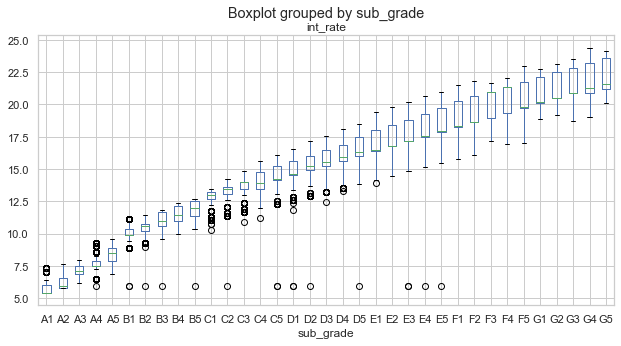

In [59]:
loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation**:
 - Interest rate increases as the subgrade moves from A towards z i.e the quality if sub grade degradesm

### 8. loan amount vs addr_state vs loan status

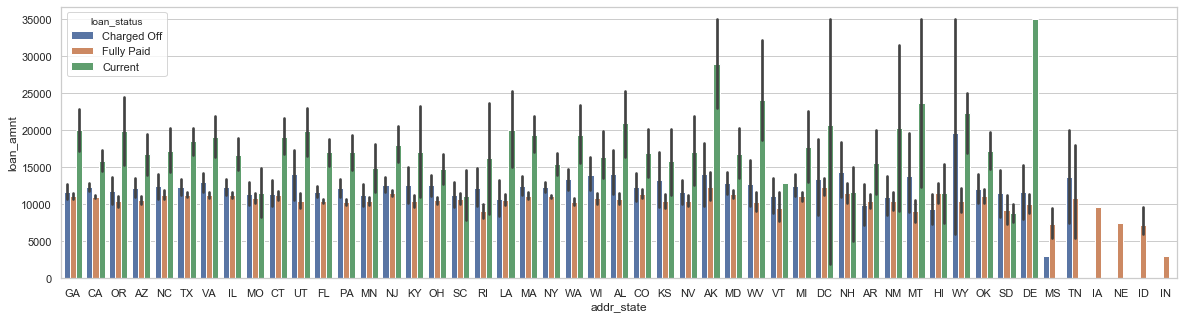

In [60]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan, estimator=np.mean)
plt.show()

**Observation**
  - State of WY has the highest default rate

### 9. Correlation Matrix 

In [61]:
loan_correaltion=loan.corr()
loan_correaltion['loan_amnt']

loan_amnt                  1.000000
int_rate                   0.308201
installment                0.928918
emp_length                 0.150920
annual_inc                 0.261317
dti                        0.067429
delinq_2yrs               -0.035000
inq_last_6mths             0.006820
open_acc                   0.173910
pub_rec                   -0.048335
revol_bal                  0.323387
revol_util                 0.070085
total_acc                  0.255741
out_prncp                  0.193202
out_prncp_inv              0.192879
total_pymnt                0.888885
total_pymnt_inv            0.866065
total_rec_prncp            0.854810
total_rec_int              0.730420
total_rec_late_fee         0.044324
recoveries                 0.136150
collection_recovery_fee    0.075101
last_pymnt_amnt            0.451000
pub_rec_bankruptcies      -0.031614
loan_income_ratio          0.618723
issue_month                0.066356
issue_year                 0.130020
early_cr_month            -0

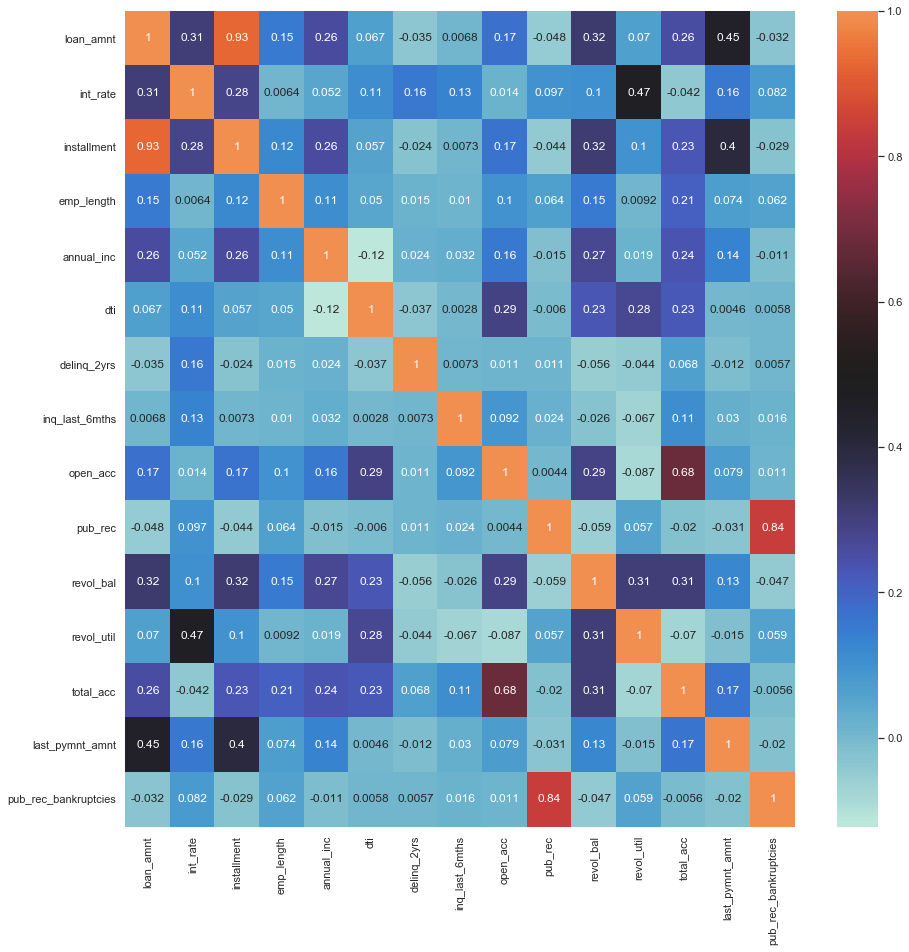

In [62]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation**:
 - loan_amnt is correlated to last_payment_amount with r factor.44
 - int_rate is correlated to revol_util with r factor of .47. This implies that company is chargonghigher rate for risky loans.

## Multivariate Analysis with Probability of Charge off

Goal is to asses if the loan will end up in default and LC can take actions based on this

P(Charge off)= applicants who charged off / total no of applicants

In [70]:
def prob_charge_off(df,col,stacked= True):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    plotCrosstab = prob_charge_off_crosstab(df,col)
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability of Default',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

### 1. Purpose of loan vs Probabilty of Charge off

In [71]:
prob_charge_off(df =loan,col ='purpose',stacked=False)

NameError: name 'prob_charge_off_crosstab' is not defined

**Observation**:
 - Borrowers with purpose = "Small business" have the highest propbability of of default. This is inline with the observation in #2 of Bivaritae analysis where we saw that small business have high dafult numbers
 - The probability of default in small business is greater than 25%
 - bank should take extra precaution while lending to small bussiness
 

### 2. Subgrade vs Probability of Charge off

In [ ]:
prob_charge_off(df =loan,col ='sub_grade',stacked=False)

### **Observation**:
 - again inline with previosu observation in #7 of bivariate analysis, the probability of defaulting is higher as sub grade of applciant mover from A to G.
 - The highest is subgrade F5 with probability > 40 %

### 3. Annul_income vs Probabilty of Charge off

In [ ]:
prob_charge_off(df =loan,col ='annual_inc_range',stacked=False)

#### **Observation**:
 - With the decrease in annual income the probability of charge off is increasing
 - the highest probability is of 17% for income range between 0-25,000 USD

### 4.  Interest rate Range vs Probability Charge Off

In [ ]:
prob_charge_off(df =loan,col ='int_rate_range',stacked=False)

**Observation**:
 - At higher interest rate the probability of person defaulting is the highest.
 - the highest probability is in the int_range15 and above with a probability of 15% and above

### 5. Employment length vs Probability charge off

In [ ]:
prob_charge_off(df =loan,col ='emp_length',stacked=False)

**Observation**:
 - Opposite to popular belief employee with ~7 years of experience have highest probability of defaulting.
 - The probability to default is > 14.5%
 - The least probable applicants will have~9 years of experience